<a href="https://colab.research.google.com/github/Gabriellemga/Python_Cursos_Alura/blob/main/Praticando_Python/Praticando_Pandas_trabalhando__com_dados_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01- Identificando valores nulos

Você recebeu um conjunto de dados em formato csv para trabalhar com dados contidos nele. Ao carregar o arquivo para o ambiente Python como um DataFrame você nota que ele contém alguns valores nan.
De que forma você pode identificar os dados nulos existentes no DataFrame? Faça a visualização de pelo menos uma linha que tenha dados nulos.


In [6]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_1_2_3.csv')
df.head()

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
0,101,Ana Silva,Smartphone,1,1500,1500,5.0,2025-01-01
1,102,João Santos,Notebook,2,3000,6000,NaN,2025-01-02
2,103,NaN,Headphone,1,200,200,5.0,2025-01-03
3,104,Lucas Pereira,Smartwatch,1,1200,1200,3.0,2025-01-04
4,105,Fernanda Lima,Mouse,3,100,300,4.0,2025-01-05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         15 non-null     int64  
 1   CustomerName    11 non-null     object 
 2   Product         15 non-null     object 
 3   Quantity        15 non-null     int64  
 4   PricePerUnit    15 non-null     int64  
 5   TotalPrice      15 non-null     int64  
 6   CustomerRating  10 non-null     float64
 7   OrderDate       15 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ KB


In [9]:
df[df['CustomerName'].isnull()]

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
2,103,NaN,Headphone,1,200,200,5.0,2025-01-03
5,106,NaN,Teclado,2,150,300,NaN,2025-01-06
9,110,NaN,Tablet,1,1100,1100,5.0,2025-01-10
11,112,NaN,Speaker Bluetooth,1,350,350,4.0,2025-01-12


## 02- Realizando a contagem de nulos

Com o mesmo conjunto de dados do exercício anterior, como você conseguiria identificar quantos valores nulos esse conjunto de dados tem em cada coluna? E como contar a quantidade total de nulos presentes no DataFrame?

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_1_2_3.csv')
df.head()

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
0,101,Ana Silva,Smartphone,1,1500,1500,5.0,2025-01-01
1,102,João Santos,Notebook,2,3000,6000,NaN,2025-01-02
2,103,NaN,Headphone,1,200,200,5.0,2025-01-03
3,104,Lucas Pereira,Smartwatch,1,1200,1200,3.0,2025-01-04
4,105,Fernanda Lima,Mouse,3,100,300,4.0,2025-01-05


In [11]:
df.isnull().sum()

,0
OrderID,0
CustomerName,4
Product,0
Quantity,0
PricePerUnit,0
TotalPrice,0
CustomerRating,5
OrderDate,0


In [12]:
df.isnull().sum().sum()

np.int64(9)

## 03-Substituindo valores nulos

Agora que você identificou adequadamente todos os dados nulos, você já pode seguir para a aplicação de um tratamento. As colunas CustomerName e CustomerRating são as colunas que contém dados nulos, um tratamento válido para esse conjunto é substituir os valores nulos do DataFrame.

Tendo isso em mente, como substituir os valores nulos da coluna CustomerName pela string 'Não especificado' e os valores de CustomerRating pelo valor -1?


In [13]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_1_2_3.csv')
df.head()

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
0,101,Ana Silva,Smartphone,1,1500,1500,5.0,2025-01-01
1,102,João Santos,Notebook,2,3000,6000,NaN,2025-01-02
2,103,NaN,Headphone,1,200,200,5.0,2025-01-03
3,104,Lucas Pereira,Smartwatch,1,1200,1200,3.0,2025-01-04
4,105,Fernanda Lima,Mouse,3,100,300,4.0,2025-01-05


In [16]:
df['CustomerName'] = df['CustomerName'].fillna('Não especificado')
df['CustomerRating'] = df['CustomerRating'].fillna(-1)
df.head()

,OrderID,CustomerName,Product,Quantity,PricePerUnit,TotalPrice,CustomerRating,OrderDate
0,101,Ana Silva,Smartphone,1,1500,1500,5.0,2025-01-01
1,102,João Santos,Notebook,2,3000,6000,-1.0,2025-01-02
2,103,Não especificado,Headphone,1,200,200,5.0,2025-01-03
3,104,Lucas Pereira,Smartwatch,1,1200,1200,3.0,2025-01-04
4,105,Fernanda Lima,Mouse,3,100,300,4.0,2025-01-05


## 04-Preenchendo com linha anterior

Ana precisa analisar um conjunto de dados que informa as temperaturas máximas na cidade de São Paulo por um período específico de tempo. Por problemas nos sensores meteorológicos, em alguns dias não foi registrada a temperatura máxima, resultando em valores ausentes no conjunto de dados.


Segundo informações do centro meteorológico, as temperaturas máximas não tiveram uma diferença brusca de um dia para outro. Com isso, Ana entendeu que seria razoável aplicar a substituição das temperaturas máximas faltantes pelos valores dos dias anteriores.

Como Ana poderia fazer essa substituição?

In [23]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_4.csv')
df.head()

,Data,Temperatura_Maxima,Cidade
0,2025-01-01,30.5,São Paulo
1,2025-01-02,NaN,São Paulo
2,2025-01-03,NaN,São Paulo
3,2025-01-04,32.0,São Paulo
4,2025-01-05,NaN,São Paulo


In [24]:
df['Temperatura_Maxima'] = df['Temperatura_Maxima'].ffill()
df

,Data,Temperatura_Maxima,Cidade
0,2025-01-01,30.5,São Paulo
1,2025-01-02,30.5,São Paulo
2,2025-01-03,30.5,São Paulo
3,2025-01-04,32.0,São Paulo
4,2025-01-05,32.0,São Paulo
5,2025-01-06,33.5,São Paulo
6,2025-01-07,33.5,São Paulo
7,2025-01-08,33.5,São Paulo
8,2025-01-09,34.0,São Paulo
9,2025-01-10,34.0,São Paulo


## 05-Preenchendo com linha posterior

Jorge, ao receber dados relacionados a pedidos feitos na empresa que trabalha, percebeu que alguns dos pedidos não continham uma data de entrega prevista registrada no momento do pedido, deixando valores ausentes no dataset.

Então, ele identificou que isso poderia ter acontecido por algum problema nos agendamentos. Para solucionar esse problema, ele decidiu assumir que os pedidos sem data de entrega herdarão a próxima data prevista no registro. Isso ocorre porque as previsões são frequentemente baseadas em lotes. Considerando isso, como Jorge poderia fazer o preenchimento dos prazos de entrega?

In [27]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_5.csv')
df

,PedidoID,Data_Pedido,Data_Entrega_Prevista
0,101,2025-01-01,2025-01-05
1,102,2025-01-02,NaN
2,103,2025-01-03,NaN
3,104,2025-01-04,2025-01-07
4,105,2025-01-05,NaN
5,106,2025-01-06,NaN
6,107,2025-01-07,2025-01-10
7,108,2025-01-08,NaN
8,109,2025-01-09,NaN
9,110,2025-01-10,NaN


In [26]:
df['Data_Entrega_Prevista'] = df['Data_Entrega_Prevista'].bfill()
df

,PedidoID,Data_Pedido,Data_Entrega_Prevista
0,101,2025-01-01,2025-01-05
1,102,2025-01-02,2025-01-07
2,103,2025-01-03,2025-01-07
3,104,2025-01-04,2025-01-07
4,105,2025-01-05,2025-01-10
5,106,2025-01-06,2025-01-10
6,107,2025-01-07,2025-01-10
7,108,2025-01-08,NaN
8,109,2025-01-09,NaN
9,110,2025-01-10,NaN


## 06-Aplicando a interpolação

Isadora está avaliando dados relacionados à visitas em um Parque Turístico ao longo de 10 dias para avaliar a eficiência das ações de marketing executadas. Ao verificar os dados, ela percebeu que faltavam alguns valores no registro:

Isadora acompanhou todos os dias de visitas ao parque e coleta de dados, ela sabe que a quantidade de visitantes variava suavemente entre os dias consecutivos. Portanto, ela entendeu que a forma ideal de garantir uma continuidade linear nos dados é substituindo os valores ausentes por meio de uma técnica de interpolação linear.

Como Isadora poderia realizar essa substituição?

Como uma extensão da atividade, realize a plotagem do número de visitantes por dia no Parque Turístico que Isadora trabalha.

In [39]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_6.csv')
df

,Data,Visitantes
0,2025-01-01,120.0
1,2025-01-02,NaN
2,2025-01-03,150.0
3,2025-01-04,NaN
4,2025-01-05,NaN
5,2025-01-06,200.0
6,2025-01-07,NaN
7,2025-01-08,250.0
8,2025-01-09,NaN
9,2025-01-10,300.0


In [40]:
df['Visitantes'] = df['Visitantes'].interpolate()
df.head()

,Data,Visitantes
0,2025-01-01,120.000000
1,2025-01-02,135.000000
2,2025-01-03,150.000000
3,2025-01-04,166.666667
4,2025-01-05,183.333333


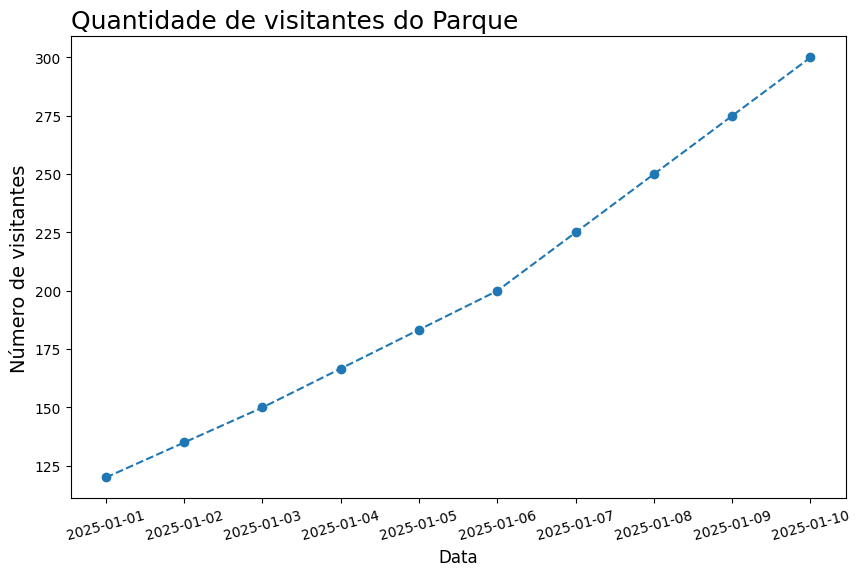

In [82]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(10,6))

ax.plot(df['Data'], df['Visitantes'], marker = 'o', linestyle = '--')
ax.set_title('Quantidade de visitantes do Parque', fontsize = 18, loc = 'left')
ax.set_ylabel('Número de visitantes', fontsize = 14)
ax.set_xlabel('Data', fontsize = 12)
ax.tick_params(axis = 'x', rotation = 15)


plt.show()

## 07-Removendo dados nulos

Augusto recebeu um conjunto de dados de alguns clientes cadastrados na empresa em que ele trabalha. Ele percebeu que algumas colunas têm vários campos ausentes, o que as tornam inadequadas para análises.

Augusto sabe que as colunas possuem muitos valores ausentes, portanto, para facilitar sua análise, é mais eficiente excluí-las evitando inconsistências. Como Augusto poderia remover as colunas com dados ausentes no conjunto de dados?

In [94]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_7.csv')
df

,ID_Cliente,Nome,Idade,Email,Telefone,Cidade
0,101,Ana,25,ana@email.com,NaN,São Paulo
1,102,João,34,NaN,NaN,Rio de Janeiro
2,103,Carol,52,NaN,NaN,Salvador
3,104,Gustavo,29,NaN,1234-5678,São Paulo
4,105,Lucas,43,NaN,NaN,Distrito Federal
5,106,Fátima,20,NaN,NaN,Campinas
6,107,Fernanda,27,NaN,NaN,Curitiba


In [95]:
df = df.dropna( axis = 1)
df

,ID_Cliente,Nome,Idade,Cidade
0,101,Ana,25,São Paulo
1,102,João,34,Rio de Janeiro
2,103,Carol,52,Salvador
3,104,Gustavo,29,São Paulo
4,105,Lucas,43,Distrito Federal
5,106,Fátima,20,Campinas
6,107,Fernanda,27,Curitiba


## 08-Removendo dados de colunas específicas

Verônica está avaliando um conjunto de dados relacionados ao cadastro de eventos que terão a cobertura da empresa em que ela trabalha. Ao observar o conjunto ela percebeu que algumas linhas das colunas 'Data' e 'Local' estavam sem informações.

Para o planejamento da cobertura dos eventos, é essencial que as informações de 'Data' e 'Local' estejam preenchidas, pois são fundamentais para identificar quando e onde o evento ocorrerá. Outras colunas podem ser opcionais.

Para que Verônica consiga avaliar adequadamente o conjunto de dados e planejar a cobertura, ela precisa ter apenas os eventos com informações completas em 'Data' e 'Local'. Como ela pode fazer isso?

In [100]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_8.csv')

df.head()

,ID_Evento,Nome_Evento,Data,Local,Participantes
0,1,Show de Rock,2025-02-01,São Paulo,500.0
1,2,Feira de Tecnologia,NaN,NaN,2000.0
2,3,NaN,2025-02-10,Rio de Janeiro,NaN
3,4,Maratona,NaN,NaN,300.0
4,5,Seminário,2025-03-05,Belo Horizonte,NaN


In [101]:
df = df.dropna(subset=['Data', 'Local'])
df

,ID_Evento,Nome_Evento,Data,Local,Participantes
0,1,Show de Rock,2025-02-01,São Paulo,500.0
2,3,NaN,2025-02-10,Rio de Janeiro,NaN
4,5,Seminário,2025-03-05,Belo Horizonte,NaN
5,6,NaN,2025-03-15,Curitiba,150.0


## 09-Removendo linhas nulas

Letícia está estudando dados relacionados ao desempenho dos estudantes na plataforma de cursos em que ela trabalha. Observando os dados, ela notou que algumas linhas estavam completamente preenchidas com valores ausentes.

Letícia entende que os dados vazios que não preenchem todas as colunas não geram problema em seu estudo, apenas aquelas linhas que estão completamente ausentes. Como Letícia poderia remover somente as linhas que têm dados inteiramente nulos?

In [106]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_9.csv')

df

,ID_Aluno,Nome,Curso,Horas_Estudo,Nota_Final,Status,Avaliação_Aluno,Data_Conclusão
0,1.0,Pedro Souza,Python para Iniciantes,10.0,8.5,Aprovado,5.0,2025-01-01
1,2.0,Ana Lima,Data Science Avançado,15.0,9.0,Aprovado,4.0,2025-01-02
2,3.0,João Santos,Machine Learning,20.0,9.5,Aprovado,5.0,2025-01-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Lucas Pereira,Visualização de Dados,12.0,8.0,Aprovado,4.0,2025-01-05
5,6.0,Fernanda Silva,Estatística Aplicada,18.0,9.2,Aprovado,5.0,2025-01-06
6,7.0,Carla Ribeiro,Análise de Sentimentos,22.0,9.8,Aprovado,5.0,2025-01-07
7,8.0,Paulo Almeida,Deep Learning,30.0,10.0,Aprovado,5.0,2025-01-08
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Rafael Mendes,Big Data,16.0,8.8,Aprovado,4.0,2025-01-10


In [107]:
df = df.dropna(how = 'all')
df

,ID_Aluno,Nome,Curso,Horas_Estudo,Nota_Final,Status,Avaliação_Aluno,Data_Conclusão
0,1.0,Pedro Souza,Python para Iniciantes,10.0,8.5,Aprovado,5.0,2025-01-01
1,2.0,Ana Lima,Data Science Avançado,15.0,9.0,Aprovado,4.0,2025-01-02
2,3.0,João Santos,Machine Learning,20.0,9.5,Aprovado,5.0,2025-01-03
4,5.0,Lucas Pereira,Visualização de Dados,12.0,8.0,Aprovado,4.0,2025-01-05
5,6.0,Fernanda Silva,Estatística Aplicada,18.0,9.2,Aprovado,5.0,2025-01-06
6,7.0,Carla Ribeiro,Análise de Sentimentos,22.0,9.8,Aprovado,5.0,2025-01-07
7,8.0,Paulo Almeida,Deep Learning,30.0,10.0,Aprovado,5.0,2025-01-08
9,10.0,Rafael Mendes,Big Data,16.0,8.8,Aprovado,4.0,2025-01-10


## 10-Ajustando dados sem informação

Você recebeu um conjunto de dados que trazem informações sobre alguns produtos vendidos na loja de departamentos da qual você trabalha. Ao abrir o arquivo, você percebeu que existem muitos dados nulos que precisam ser tratados antes desse conjunto de dados ser levado à uma análise.

A coluna Estoque tem muitos dados nulos, o que torna mais eficiente a remoção da coluna inteira ao invés de tentar substituir os dados ausentes. Já a coluna Categoria tem alguns dados nulos, então para evitar perda de mais informação, a recomendação é preencher os dados nulos com o texto 'Não especificada'.

Seu objetivo é aplicar as recomendações descritas, tratando os dados nulos desse conjunto.

In [118]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Python_Cursos_Alura/refs/heads/main/Praticando_Python/Dados%20das%20atividades/atividades_10.csv')
df

,ID_Produto,Nome_Produto,Categoria,Estoque
0,1,Smartphone Samsung Galaxy,Eletrônicos,25.0
1,2,Notebook Dell Inspiron,NaN,NaN
2,3,Headphone Sony WH-1000XM4,Eletrônicos,50.0
3,4,Smart TV LG OLED,NaN,NaN
4,5,Cafeteira Nespresso,Eletrodomésticos,NaN
5,6,Fritadeira Airfryer Mondial,NaN,NaN
6,7,Geladeira Brastemp Frost Free,Eletrodomésticos,NaN
7,8,Micro-ondas Electrolux,Eletrodomésticos,20.0
8,9,Aspirador de Pó RoboVac,NaN,NaN
9,10,Monitor Gamer Samsung,Eletrônicos,NaN


In [119]:
df = df.drop(['Estoque'], axis = 1)
df['Categoria'] = df['Categoria'].fillna('Não especificado')
df

,ID_Produto,Nome_Produto,Categoria
0,1,Smartphone Samsung Galaxy,Eletrônicos
1,2,Notebook Dell Inspiron,Não especificado
2,3,Headphone Sony WH-1000XM4,Eletrônicos
3,4,Smart TV LG OLED,Não especificado
4,5,Cafeteira Nespresso,Eletrodomésticos
5,6,Fritadeira Airfryer Mondial,Não especificado
6,7,Geladeira Brastemp Frost Free,Eletrodomésticos
7,8,Micro-ondas Electrolux,Eletrodomésticos
8,9,Aspirador de Pó RoboVac,Não especificado
9,10,Monitor Gamer Samsung,Eletrônicos
